# Classification in Python with GitHub Copilot

To run and replicate this demo, leverage Copilot's assistance by pressing the `ENTER` key after each comment, followed by `Tab` when the Copilot suggestion appears on the screen. Once the cells are complete, just run them in order.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv"
df = pd.read_csv(url)

In [2]:
# printing the first 5 rows of the dataset
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


<AxesSubplot:>

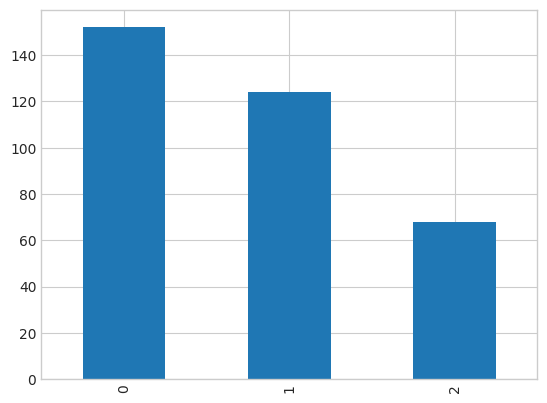

In [3]:
# Let's visualize the distribution of the penguins species with a bar plot in matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df['Species'].value_counts().plot(kind='bar')  

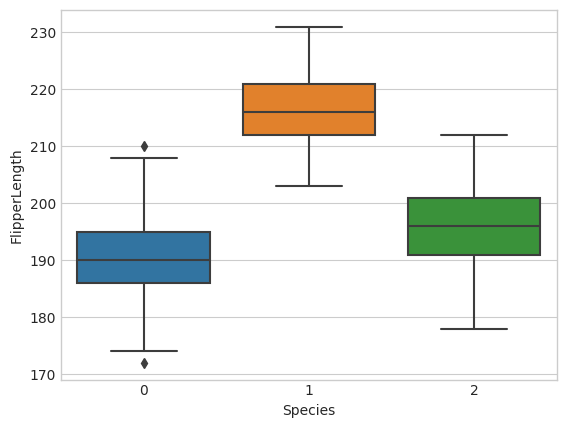

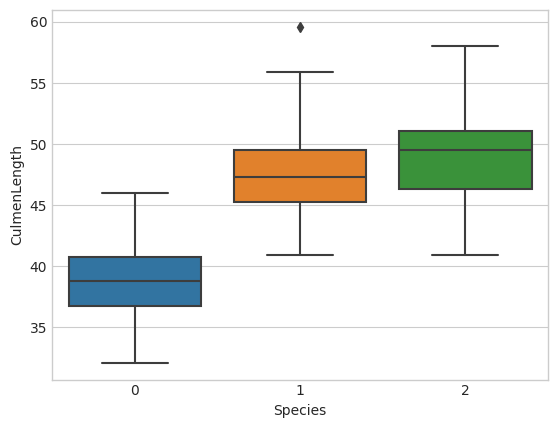

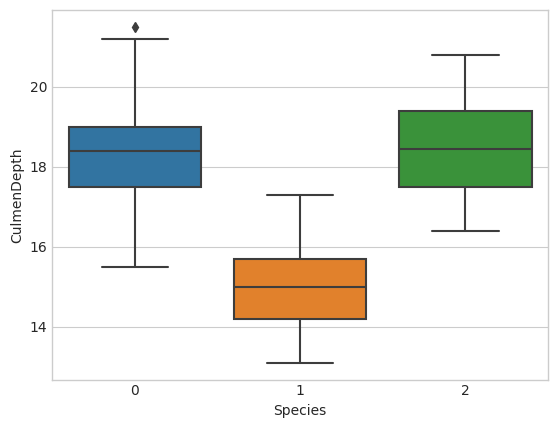

In [6]:
# importing seaborn
# Let's visualize with boxplots how the FlipperLength, CulmenLength and CulmenDepth are distributed for each species
import seaborn as sns
sns.boxplot(x='Species', y='FlipperLength', data=df) # FlipperLength is the length of the flipper of the penguin
plt.show()
sns.boxplot(x='Species', y='CulmenLength', data=df) # CulmenLength is the length of the upper mandible of the penguin
plt.show()
sns.boxplot(x='Species', y='CulmenDepth', data=df)  # CulmenDepth is the depth of the upper mandible of the penguin
plt.show()


In [7]:
# Show rows with missing values
df[df.isnull().any(axis=1)]


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [9]:
# Drop rows with missing values
df = df.dropna()

In [10]:
# Let's prepare for training:
# 1. Split the data into features and labels
# 2. Split the data into training and test sets

# Split the data into features and labels
# features are CulmenLength, CulmenDepth, FlipperLength
# labels are Species
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength']
labels = ['Species']

In [12]:
# Split the data into training and test sets in a way to have 30% of the data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[labels], test_size=0.30, random_state=0)

In [15]:
# Let's train a Logistic Regression model
# 1. Create a multiclass Logistic Regression with solver lbfgs, which is a good solver for multiclass problems, and multinomial as the multiclass option, other options are one-vs-rest (ovr) and softmax
# 2. Train the model

# Create a multiclass Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Train the model
model.fit(X_train, y_train.values.ravel())

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [16]:
# Let's evaluate the model
# 1. Predict the labels of the test set
# 2. Calculate the accuracy of the model

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9902912621359223